In [1]:
# STEP 1: Install dependencies (only required in Colab)
!pip install -q scikit-learn matplotlib

# STEP 2: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# STEP 3: Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)  # shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)    # shape: (10000, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),

    layers.Flatten(),

    layers.Dense(units=128, activation='relu', name='embedding'),

    layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

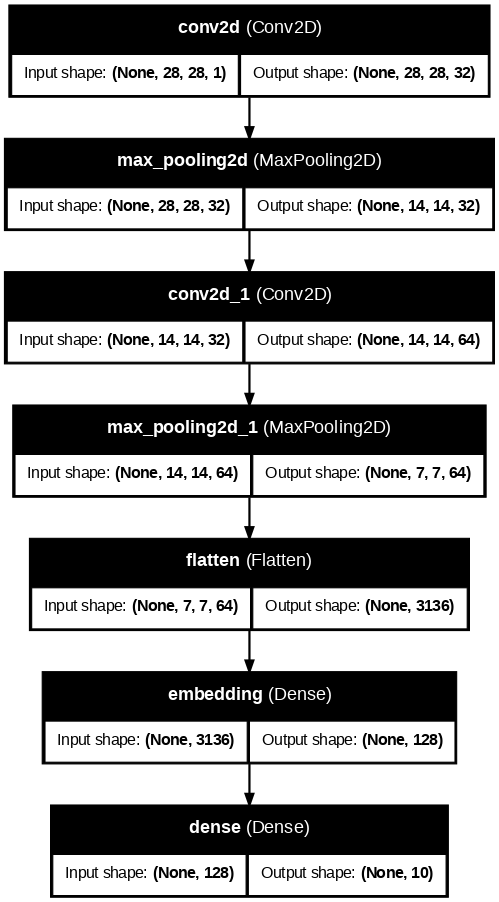

In [4]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save colored, readable vertical plot
plot_model(
    model,
    to_file='model_plot.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',     # TB = vertical layout
    dpi=80            # Compact and readable on 13.3" screen
)

# Display image
Image('model_plot.png')





In [5]:
model.save("my_model.h5")
from google.colab import files
files.download("my_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,                # Change to 3, 5, 10, etc.
    batch_size=64,
    validation_split=0.4,     # 30% data used for validation
    verbose=1
)



Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8521 - loss: 0.4812 - val_accuracy: 0.9748 - val_loss: 0.0825
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9812 - loss: 0.0611 - val_accuracy: 0.9809 - val_loss: 0.0625
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9883 - loss: 0.0374 - val_accuracy: 0.9854 - val_loss: 0.0475
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9943 - loss: 0.0168 - val_accuracy: 0.9862 - val_loss: 0.0465
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0.9865 - val_loss: 0.0499
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9871 - val_loss: 0.0519
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accurac

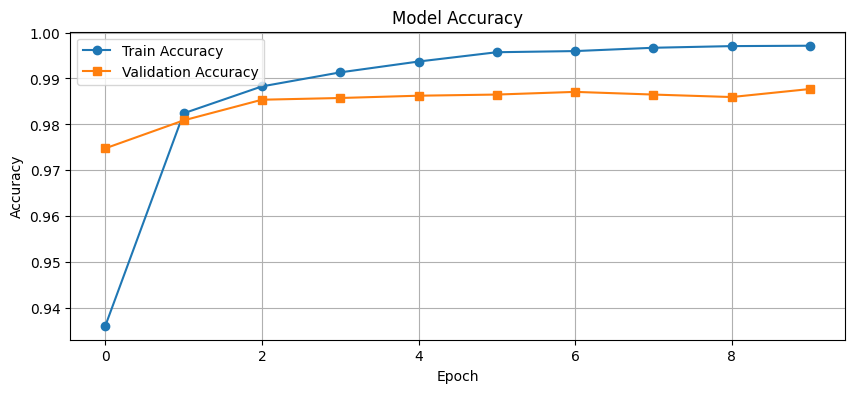

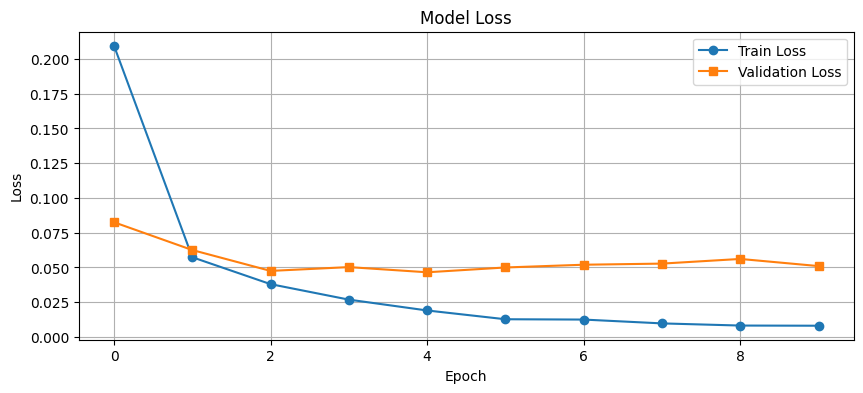

In [7]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
_ = model.predict(x_test[:1])  # Just to build model.input and model.get_layer()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


In [9]:
# Call the model on some data to define its input shape
_ = model(x_test[:1])

In [10]:
# Grab the layer output directly by name (this works even in Sequential!)
embedding_layer_output = model.get_layer('embedding').output

# Define a new model using the existing full model as input and embedding layer as output
embedding_model = tf.keras.Model(inputs=model.inputs, outputs=embedding_layer_output)


In [11]:
x_subset = x_test[:2000]
y_subset = y_test[:2000]

feature_embeddings = embedding_model.predict(x_subset)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


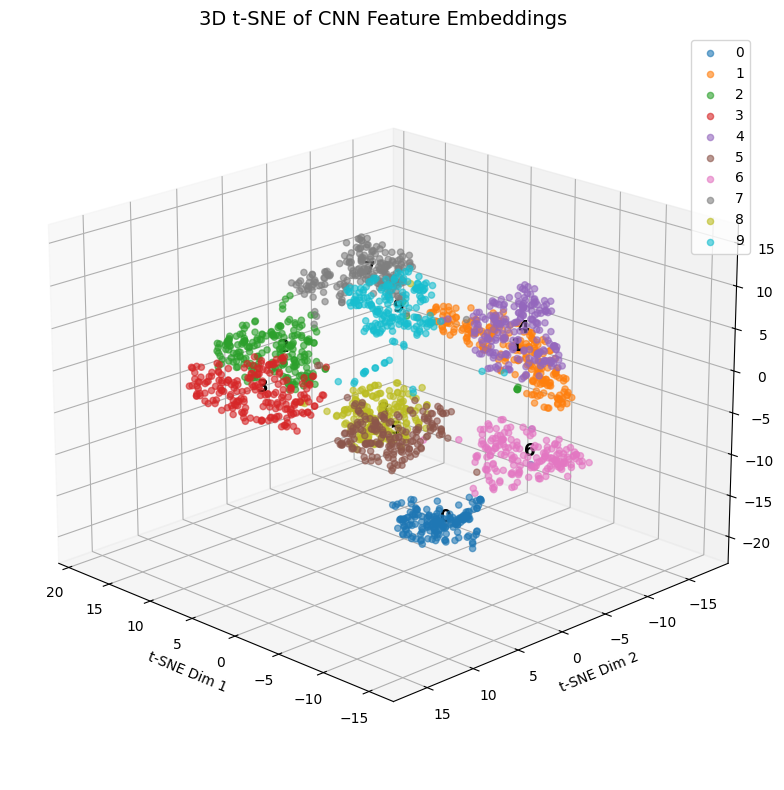

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D projection
import numpy as np

# Step 1: Apply t-SNE (3D)
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
tsne_features = tsne_3d.fit_transform(feature_embeddings)

# Step 2: Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Step 3: Assign different color to each digit
colors = plt.cm.tab10(np.arange(10))

for digit in range(10):
    idxs = y_subset == digit
    ax.scatter(
        tsne_features[idxs, 0],
        tsne_features[idxs, 1],
        tsne_features[idxs, 2],
        label=str(digit),
        alpha=0.6,
        color=colors[digit]
    )

    # Plot digit name at cluster center
    cluster_center = tsne_features[idxs].mean(axis=0)
    ax.text(cluster_center[0], cluster_center[1], cluster_center[2], str(digit),
            color='black', fontsize=12, weight='bold')

# Step 4: Configure plot
ax.set_title("3D t-SNE of CNN Feature Embeddings", fontsize=14)
ax.set_xlabel("t-SNE Dim 1")
ax.set_ylabel("t-SNE Dim 2")
ax.set_zlabel("t-SNE Dim 3")
ax.view_init(elev=20, azim=135)  # Adjust view angle
plt.legend()
plt.tight_layout()
plt.show()



In [13]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import plot
from google.colab import files
import numpy as np

# ✅ Assume you already have these ready:
# feature_embeddings: (2000, 128) array from embedding layer
# y_subset: (2000,) labels of the corresponding test set

# 🧠 Run 3D t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
tsne_features = tsne.fit_transform(feature_embeddings)

# 🎨 Plotly colors for each digit
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

# 📊 Create 3D scatter plot
fig = go.Figure()

for digit in range(10):
    idxs = y_subset == digit
    fig.add_trace(go.Scatter3d(
        x=tsne_features[idxs, 0],
        y=tsne_features[idxs, 1],
        z=tsne_features[idxs, 2],
        mode='markers',
        name=str(digit),
        marker=dict(
            size=3,
            color=colors[digit],
            opacity=0.7
        )
    ))

fig.update_layout(
    title="3D t-SNE of CNN Feature Embeddings",
    scene=dict(
        xaxis_title="t-SNE 1",
        yaxis_title="t-SNE 2",
        zaxis_title="t-SNE 3"
    )
)

# 💾 Save the plot as HTML
plot(fig, filename='tsne_plot.html', auto_open=False)

# 📥 Download the HTML file (Colab → your Mac)
files.download('tsne_plot.html')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import plot
from google.colab import files
import numpy as np

# ✅ Step 1: Prepare raw data (use x_test[:2000])
# Assume x_test already loaded and preprocessed
x_raw = x_test[:2000]              # shape: (2000, 28, 28, 1)
x_flat = x_raw.reshape(2000, -1)   # shape: (2000, 784)
y_raw = y_test[:2000]              # shape: (2000,)

# ✅ Step 2: Run 3D t-SNE on raw pixels
tsne_raw = TSNE(n_components=3, random_state=42, perplexity=30)
tsne_features_raw = tsne_raw.fit_transform(x_flat)

# ✅ Step 3: Plotly 3D scatter plot
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]

fig_raw = go.Figure()

for digit in range(10):
    idxs = y_raw == digit
    fig_raw.add_trace(go.Scatter3d(
        x=tsne_features_raw[idxs, 0],
        y=tsne_features_raw[idxs, 1],
        z=tsne_features_raw[idxs, 2],
        mode='markers',
        name=str(digit),
        marker=dict(
            size=3,
            color=colors[digit],
            opacity=0.7
        )
    ))

fig_raw.update_layout(
    title="3D t-SNE of Raw MNIST Images (Pixels)",
    scene=dict(
        xaxis_title="t-SNE 1",
        yaxis_title="t-SNE 2",
        zaxis_title="t-SNE 3"
    )
)

# ✅ Step 4: Save and Download
plot(fig_raw, filename='tsne_raw_plot.html', auto_open=False)
files.download('tsne_raw_plot.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import plot
from google.colab import files
import os

# Step 1: Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = y_train.astype("int")
y_test = y_test.astype("int")

# Step 2: Build Functional Model
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
embedding_output = tf.keras.layers.Dense(128, activation='relu', name='embedding')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(embedding_output)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Step 3: Compile and Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Step 4: Build embedding model
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("embedding").output)

# Step 5: Prepare test data and rotations
x_base = x_test[:2000]
y_base = y_test[:2000]

rotations = {
    "0": 0,
    "90": 1,
    "180": 2,
    "270": 3
}

accuracies = []

def rotate_images(images, k):
    return tf.image.rot90(images, k=k).numpy()

# Step 6: Evaluate and t-SNE
def evaluate_rotation(rotation_name, k):
    print(f"\n▶ Rotation: {rotation_name}°")
    x_rot = rotate_images(x_base, k)
    y_rot = y_base

    # Accuracy
    loss, acc = model.evaluate(x_rot, y_rot, verbose=0)
    print(f"Accuracy: {acc:.4f}")
    accuracies.append(acc)

    # Embeddings
    embeddings = embedding_model.predict(x_rot, verbose=0)

    # t-SNE
    tsne = TSNE(n_components=3, perplexity=37, random_state=47)
    tsne_result = tsne.fit_transform(embeddings)

    # Plotly 3D plot
    fig = go.Figure()
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
    for digit in range(10):
        idx = y_rot == digit
        fig.add_trace(go.Scatter3d(
            x=tsne_result[idx, 0],
            y=tsne_result[idx, 1],
            z=tsne_result[idx, 2],
            mode='markers',
            name=str(digit),
            marker=dict(size=3, color=colors[digit], opacity=0.7)
        ))

    fig.update_layout(
        title=f"3D t-SNE Embeddings ({rotation_name}°)",
        scene=dict(
            xaxis_title="TSNE-1",
            yaxis_title="TSNE-2",
            zaxis_title="TSNE-3"
        )
    )

    filename = f"tsne_{rotation_name}.html"
    plot(fig, filename=filename, auto_open=True)

# Step 7: Run for all rotations
for name, k in rotations.items():
    evaluate_rotation(name, k)

# Step 8: Report average accuracy
avg = np.mean(accuracies)
print(f"\n✅ Average Test Accuracy across rotations: {avg * 100:.2f}%")

# Step 9: Download plots
for name in rotations.keys():
    filename = f"tsne_{name}.html"
    if os.path.exists(filename):
        files.download(filename)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9107 - loss: 0.2911 - val_accuracy: 0.9860 - val_loss: 0.0480
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9865 - val_loss: 0.0432
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9912 - val_loss: 0.0330

▶ Rotation: 0°
Accuracy: 0.9865

▶ Rotation: 90°
Accuracy: 0.1455

▶ Rotation: 180°
Accuracy: 0.3985

▶ Rotation: 270°
Accuracy: 0.1345

✅ Average Test Accuracy across rotations: 41.63%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import os
from google.colab import files

# --- Load MNIST ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
y_train, y_test = y_train.astype(int), y_test.astype(int)

# --- Functional Model ---
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
embed = tf.keras.layers.Dense(128, activation='relu', name="embedding")(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(embed)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

# Embedding extractor
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("embedding").output)

# --- Rotation Setup ---
x_base = x_test[:2000]
y_base = y_test[:2000]
rotations = {"0°": 0, "90°": 1, "180°": 2, "270°": 3}
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

# --- Main loop ---
tsne_results = {}
accuracies = {}

def rotate(images, k):
    return tf.image.rot90(images, k=k).numpy()

for name, k in rotations.items():
    x_rot = rotate(x_base, k)
    y_rot = y_base
    loss, acc = model.evaluate(x_rot, y_rot, verbose=0)
    accuracies[name] = acc

    embeddings = embedding_model.predict(x_rot, verbose=0)
    tsne = TSNE(n_components=3, random_state=47, perplexity=37)
    tsne_embed = tsne.fit_transform(embeddings)
    tsne_results[name] = (tsne_embed, y_rot)

# --- Plot side-by-side ---
for name in rotations.keys():
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'scene'}, {'type': 'bar'}]],
        subplot_titles=(f"3D t-SNE ({name})", f"Accuracy ({name})")
    )

    tsne_data, y_rot = tsne_results[name]

    for digit in range(10):
        idx = y_rot == digit
        fig.add_trace(go.Scatter3d(
            x=tsne_data[idx, 0],
            y=tsne_data[idx, 1],
            z=tsne_data[idx, 2],
            mode='markers',
            name=str(digit),
            marker=dict(size=3, color=colors[digit], opacity=0.7)
        ), row=1, col=1)

    # Add accuracy bar
    fig.add_trace(go.Bar(
        x=[name],
        y=[accuracies[name]],
        marker_color='green',
        name='Accuracy'
    ), row=1, col=2)

    fig.update_layout(height=500, width=1000, showlegend=False)
    fig.update_scenes(
        xaxis_title="TSNE-1", yaxis_title="TSNE-2", zaxis_title="TSNE-3"
    )
    filename = f"compare_tsne_accuracy_{name.replace('°','')}.html"
    plot(fig, filename=filename, auto_open=True)
    files.download(filename)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8959 - loss: 0.3402 - val_accuracy: 0.9792 - val_loss: 0.0688
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9864 - val_loss: 0.0453
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.9862 - val_loss: 0.0438
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9928 - loss: 0.0209 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9892 - val_loss: 0.0405


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import os
from google.colab import files

# --- Step 1: Load & Preprocess MNIST ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
y_train, y_test = y_train.astype(int), y_test.astype(int)

# --- Step 2: Define Functional CNN Model ---
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
embed = tf.keras.layers.Dense(128, activation='relu', name="embedding")(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(embed)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# --- Step 3: Train ---
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_split=0.25)

embedding_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer("embedding").output)

# --- Step 4: Subset + Setup ---
x_base = x_test[:2000]
y_base = y_test[:2000]
rotations = {"0°": 0, "90°": 1, "180°": 2, "270°": 3}
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
          '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

tsne_results = {}
accuracies = {}

def rotate_images(images, k):
    return tf.image.rot90(images, k=k).numpy()

# --- Step 5: Run t-SNE and accuracy for each rotation ---
for name, k in rotations.items():
    x_rot = rotate_images(x_base, k)
    y_rot = y_base

    loss, acc = model.evaluate(x_rot, y_rot, verbose=0)
    accuracies[name] = acc

    embeddings = embedding_model.predict(x_rot, verbose=0)
    tsne = TSNE(n_components=3, random_state=42, perplexity=30)
    tsne_embed = tsne.fit_transform(embeddings)

    tsne_results[name] = (tsne_embed, y_rot)

# --- Step 6: Create Combined Plot ---
cols = 2
rows = 2
fig = make_subplots(
    rows=rows + 1, cols=cols,
    specs=[[{'type': 'scene'}, {'type': 'scene'}],
           [{'type': 'scene'}, {'type': 'scene'}],
           [{'type': 'xy', 'colspan': 2}, None]],
    subplot_titles=[f"t-SNE {k}" for k in rotations.keys()] + ["Accuracy Comparison"]
)

rotation_names = list(rotations.keys())
for idx, name in enumerate(rotation_names):
    tsne_data, y_labels = tsne_results[name]
    row = (idx // 2) + 1
    col = (idx % 2) + 1

    for digit in range(10):
        mask = (y_labels == digit)
        fig.add_trace(
            go.Scatter3d(
                x=tsne_data[mask, 0],
                y=tsne_data[mask, 1],
                z=tsne_data[mask, 2],
                mode='markers',
                marker=dict(size=2, color=colors[digit], opacity=0.7),
                name=str(digit),
                showlegend=(row == 1 and col == 1 and digit < 1)
            ),
            row=row, col=col
        )

# --- Step 7: Add accuracy bar plot ---
fig.add_trace(
    go.Bar(
        x=rotation_names,
        y=[accuracies[k] for k in rotation_names],
        marker_color='green',
        name='Accuracy'
    ),
    row=3, col=1
)

# --- Final layout tweaks ---
fig.update_layout(
    height=1200, width=1000,
    title="t-SNE Embeddings & Accuracy Comparison for Rotated MNIST",
    scene=dict(
        xaxis_title="TSNE-1",
        yaxis_title="TSNE-2",
        zaxis_title="TSNE-3"
    )
)

# --- Step 8: Save & Download ---
filename = "tsne_accuracy_comparison.html"
plot(fig, filename=filename, auto_open=True)
files.download(filename)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8978 - loss: 0.3299 - val_accuracy: 0.9800 - val_loss: 0.0656
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0468 - val_accuracy: 0.9824 - val_loss: 0.0602
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9843 - val_loss: 0.0544
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9876 - val_loss: 0.0458
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9873 - val_loss: 0.0508


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import plot
from google.colab import files

# Step 1: Load & Preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

# Step 2: Define Base Model
def create_base_model():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
    x = tf.keras.layers.Flatten()(x)
    emb = tf.keras.layers.Dense(128, activation='relu', name="embedding")(x)
    out = tf.keras.layers.Dense(10, activation='softmax')(emb)
    return tf.keras.Model(inputs, out)

# Step 3: Rotation-Consistency Wrapper Model
class RotationConsistentModel(tf.keras.Model):
    def __init__(self, base_model, alpha=0.2):
        super().__init__()
        self.base_model = base_model
        self.alpha = alpha
        self.embedding_model = tf.keras.Model(
            inputs=base_model.input,
            outputs=base_model.get_layer("embedding").output
        )

    def call(self, inputs, training=False):
        logits = self.base_model(inputs, training=training)
        x_rot = tf.image.rot90(inputs, k=1)
        emb_orig = self.embedding_model(inputs, training=training)
        emb_rot = self.embedding_model(x_rot, training=training)
        diff = tf.norm(emb_orig - emb_rot, axis=1)
        self.add_loss(self.alpha * tf.reduce_mean(diff))
        return logits

# Step 4: Compile & Train
base_model = create_base_model()
model = RotationConsistentModel(base_model)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Step 5: t-SNE Plotting
embedding_model = tf.keras.Model(base_model.input, base_model.get_layer("embedding").output)
x_base, y_base = x_test[:2000], y_test[:2000]
rotations = {"0°": 0, "90°": 1, "180°": 2, "270°": 3}
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
          '#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
tsne_results = {}
accuracies = {}

def rotate_images(x, k):
    return tf.image.rot90(x, k=k).numpy()

for name, k in rotations.items():
    x_rot = rotate_images(x_base, k)
    acc = model.evaluate(x_rot, y_base, verbose=0)[1]
    accuracies[name] = acc
    emb = embedding_model.predict(x_rot, verbose=0)
    tsne = TSNE(n_components=3, random_state=42, perplexity=30)
    tsne_result = tsne.fit_transform(emb)
    tsne_results[name] = (tsne_result, y_base)

# Step 6: Plot
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}],
           [{'type': 'scene'}, {'type': 'scene'}],
           [{'type': 'xy', 'colspan': 2}, None]],
    subplot_titles=list(rotations.keys()) + ["Accuracy Comparison"]
)

for idx, (name, (tsne_data, y_vals)) in enumerate(tsne_results.items()):
    row, col = (idx // 2) + 1, (idx % 2) + 1
    for digit in range(10):
        mask = y_vals == digit
        fig.add_trace(
            go.Scatter3d(
                x=tsne_data[mask, 0],
                y=tsne_data[mask, 1],
                z=tsne_data[mask, 2],
                mode='markers',
                marker=dict(size=2, color=colors[digit], opacity=0.7),
                name=str(digit),
                showlegend=(idx == 0 and digit == 0)
            ),
            row=row, col=col
        )

# Accuracy bar plot
fig.add_trace(
    go.Bar(x=list(accuracies.keys()), y=list(accuracies.values()), name='Accuracy', marker_color='green'),
    row=3, col=1
)

fig.update_layout(height=1200, width=1000, title="Rotation-Consistent t-SNE & Accuracy")
plot(fig, filename="rotation_tsne_accuracy.html", auto_open=True)
files.download("rotation_tsne_accuracy.html")


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8637 - loss: 0.8013 - val_accuracy: 0.9765 - val_loss: 0.2351
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9734 - loss: 0.2394 - val_accuracy: 0.9797 - val_loss: 0.1870
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9807 - loss: 0.1794 - val_accuracy: 0.9865 - val_loss: 0.1410
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9848 - loss: 0.1477 - val_accuracy: 0.9860 - val_loss: 0.1356
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9893 - loss: 0.1233 - val_accuracy: 0.9895 - val_loss: 0.1157


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot

# Step 1: Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Subset for visualization
x_vis = x_test[:2000]
y_vis = y_test[:2000]

# Step 2: Define CNN model
cnn_input = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(cnn_input)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
cnn_embed = tf.keras.layers.Dense(128, activation='relu', name='embedding')(x)
cnn_output = tf.keras.layers.Dense(10, activation='softmax')(cnn_embed)
cnn_model = tf.keras.Model(inputs=cnn_input, outputs=cnn_output)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=3, validation_split=0.1, verbose=0)
cnn_embed_model = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("embedding").output)

# Step 3: Define ViT-style (patch-wise CNN) using MobileNetV2
vit_base = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights=None, pooling='avg')
vit_input = tf.keras.Input(shape=(96, 96, 3))
vit_x = vit_base(vit_input)
vit_embed = tf.keras.layers.Dense(128, activation='relu', name='embedding')(vit_x)
vit_output = tf.keras.layers.Dense(10, activation='softmax')(vit_embed)
vit_model = tf.keras.Model(inputs=vit_input, outputs=vit_output)
vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare data for ViT model
x_train_vit = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train)), (96, 96)).numpy()
x_test_vit = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test)), (96, 96)).numpy()
x_vis_vit = x_test_vit[:2000]
vit_model.fit(x_train_vit, y_train, epochs=3, validation_split=0.1, verbose=0)
vit_embed_model = tf.keras.Model(inputs=vit_model.input, outputs=vit_model.get_layer("embedding").output)

# Step 4: Rotate images
def rotate_images(images, k):
    return tf.image.rot90(images, k=k).numpy()

x_rot_cnn = rotate_images(x_vis, 1)
x_rot_vit = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_rot_cnn)), (96, 96)).numpy()

# Step 5: Extract embeddings
embed_cnn = cnn_embed_model.predict(x_vis)
embed_cnn_rot = cnn_embed_model.predict(x_rot_cnn)
embed_vit = vit_embed_model.predict(x_vis_vit)
embed_vit_rot = vit_embed_model.predict(x_rot_vit)

# Step 6: Compute t-SNE
def compute_tsne(embeddings):
    return TSNE(n_components=3, perplexity=30, random_state=42).fit_transform(embeddings)

tsne_cnn = compute_tsne(embed_cnn)
tsne_cnn_rot = compute_tsne(embed_cnn_rot)
tsne_vit = compute_tsne(embed_vit)
tsne_vit_rot = compute_tsne(embed_vit_rot)

# Step 7: Cluster distance metric
def cluster_distances(embeddings, labels):
    intra = []
    inter = []
    for i in range(10):
        class_i = embeddings[labels == i]
        if len(class_i) < 2:
            continue
        intra.append(np.mean(pairwise_distances(class_i, class_i)))
        for j in range(i + 1, 10):
            class_j = embeddings[labels == j]
            if len(class_j) < 2:
                continue
            inter.append(np.mean(pairwise_distances(class_i, class_j)))
    return np.mean(intra), np.mean(inter)

cnn_intra, cnn_inter = cluster_distances(embed_cnn, y_vis)
cnn_rot_intra, cnn_rot_inter = cluster_distances(embed_cnn_rot, y_vis)
vit_intra, vit_inter = cluster_distances(embed_vit, y_vis)
vit_rot_intra, vit_rot_inter = cluster_distances(embed_vit_rot, y_vis)

# Step 8: Plot t-SNE and cluster distances
fig = make_subplots(rows=2, cols=3,
                    specs=[[{'type': 'scene'}, {'type': 'scene'}, {'type': 'xy'}],
                           [{'type': 'scene'}, {'type': 'scene'}, None]],
                    subplot_titles=[
                        'CNN t-SNE', 'CNN Rotated t-SNE', 'Cluster Distance',
                        'ViT t-SNE', 'ViT Rotated t-SNE'
                    ])

def add_tsne_trace(fig, tsne_data, labels, row, col):
    for i in range(10):
        mask = labels == i
        fig.add_trace(go.Scatter3d(
            x=tsne_data[mask, 0],
            y=tsne_data[mask, 1],
            z=tsne_data[mask, 2],
            mode='markers',
            name=str(i),
            marker=dict(size=3),
            showlegend=(row == 1 and col == 1 and i == 0)
        ), row=row, col=col)

add_tsne_trace(fig, tsne_cnn, y_vis, 1, 1)
add_tsne_trace(fig, tsne_cnn_rot, y_vis, 1, 2)
add_tsne_trace(fig, tsne_vit, y_vis, 2, 1)
add_tsne_trace(fig, tsne_vit_rot, y_vis, 2, 2)

# Cluster distances bar chart
fig.add_trace(go.Bar(name='Intra-Cluster', x=['CNN', 'CNN Rot', 'ViT', 'ViT Rot'],
                     y=[cnn_intra, cnn_rot_intra, vit_intra, vit_rot_intra],
                     marker_color='blue'), row=1, col=3)

fig.add_trace(go.Bar(name='Inter-Cluster', x=['CNN', 'CNN Rot', 'ViT', 'ViT Rot'],
                     y=[cnn_inter, cnn_rot_inter, vit_inter, vit_rot_inter],
                     marker_color='red'), row=1, col=3)

fig.update_layout(height=800, width=1300, title="t-SNE and Cluster Distance Comparison")
html_path = "/mnt/data/tsne_cluster_comparison.html"
plot(fig, filename=html_path, auto_open=False)
html_path
